# **MACHINE LEARNING Dengan (SUPERVISED LEARNING)**

Klasifikasi menggunakan 5 model yaitu Naive Bayes, Random Forest, Decision Tree, K-Nearest Neighbor (KNN) & SVM (Support Vector Machines)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/content/Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140,3449,10.5,70,usa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    int64  
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df.isnull().sum()

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0


In [5]:
# Menghapus kolom
df.drop(columns=['name'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,usa
1,15.0,8,350.0,165,3693,11.5,70,usa
2,18.0,8,318.0,150,3436,11.0,70,usa
3,16.0,8,304.0,150,3433,12.0,70,usa
4,17.0,8,302.0,140,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,usa
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,usa
396,28.0,4,120.0,79,2625,18.6,82,usa


In [6]:
df.rename(columns = {"cylinders" : "x1", "displacement" : "x2", "horsepower" : "x3", "weight" : "x4", "acceleration" : "x5", "model_year" : "x6", "mpg" : "x7", "origin" : "y"}, inplace = True)
df.head()

,x7,x1,x2,x3,x4,x5,x6,y
0,18.0,8,307.0,130,3504,12.0,70,usa
1,15.0,8,350.0,165,3693,11.5,70,usa
2,18.0,8,318.0,150,3436,11.0,70,usa
3,16.0,8,304.0,150,3433,12.0,70,usa
4,17.0,8,302.0,140,3449,10.5,70,usa


# 1. Model Naive Bayes classifier

Accuracy: 0.63

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.04      0.07        23
           1       0.40      0.88      0.55        24
           2       0.87      0.74      0.80        73

    accuracy                           0.63       120
   macro avg       0.48      0.55      0.47       120
weighted avg       0.64      0.63      0.61       120



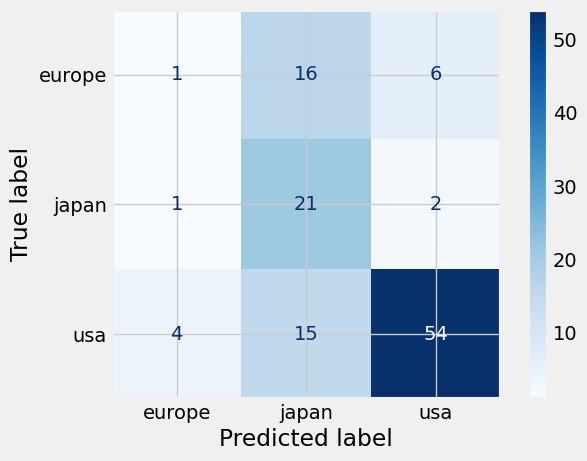

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming 'df' is your DataFrame with the renamed columns
data = df  # Assign df to data to use the updated column names

# Mengubah kolom 'origin' menjadi variabel target y
label_encoder = LabelEncoder()
data['y_encoded'] = label_encoder.fit_transform(data['y'])  # Mengubah origin (now 'y') menjadi angka

# Memilih fitur prediktor
features = ['x3', 'x4', 'x7']  # Menggunakan Variabel weight,horse power,mpg
X = data[features]
y = data['y_encoded']  # Target: origin yang telah di-encode

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")

Akurasi model adalah 63%, yang menunjukkan bahwa model Naive Bayes dapat memprediksi label dengan benar dalam 63% kasus.

1. Kelas europe(o):
- Precision: 0.17, Recall: 0.04, F1-score: 0.07.
- Model kesulitan memprediksi kelas ini dengan benar (Recall sangat rendah), yang menunjukkan bahwa sebagian besar contoh kelas ini salah diprediksi.

2. Kelas 'japan' (1):
- Precision: 0.40, Recall: 0.88, F1-score: 0.55.
- Kelas ini cukup sering dikenali dengan benar (Recall tinggi), tetapi terdapat cukup banyak false positives, menghasilkan Precision yang lebih rendah.

3. Kelas 'usa' (2):
- Precision: 0.87, Recall: 0.74, F1-score: 0.80.
- Kinerja model paling baik untuk kelas ini, menunjukkan bahwa model lebih cenderung mengenali 'usa' dengan baik dibandingkan kelas lainnya.



Penjelsan Confusion Matrix Naive Bayes


---
1. True Positives(TP):
- Untuk kelas europe (0): 1 data diprediksi dengan benar sebagai "europe."
- Untuk kelas japan (1): 21 data diprediksi dengan benar sebagai "japan."
- Untuk kelas usa (2): 54 data diprediksi dengan benar sebagai "usa."

2. True Negatives (TN):
- Untuk kelas europe (0): Data yang sebenarnya adalah "japan" atau "usa" dan tidak diprediksi sebagai europe.
- Untuk kelas japan (1): Data yang sebenarnya adalah "europe" atau "usa" dan tidak diprediksi sebagai japan.
- Untuk kelas usa (2): Data yang sebenarnya adalah "europe" atau "japan" dan tidak diprediksi sebagai usa.

3. False Positives (FP):
- Untuk kelas europe (0): 4 data sebenarnya "japan" atau "usa," tetapi salah diprediksi sebagai "europe."
- Untuk kelas japan (1): 16 data sebenarnya "europe" atau "usa," tetapi salah diprediksi sebagai "japan."
- Untuk kelas usa (2): 15 data sebenarnya "europe" atau "japan," tetapi salah diprediksi sebagai "usa."

4. False Negatives (FN):
- Untuk kelas europe (0): 22 data sebenarnya "europe," tetapi salah diprediksi sebagai "japan" atau "usa."
- Untuk kelas japan (1): 3 data sebenarnya "japan," tetapi salah diprediksi sebagai "europe" atau "usa."
- Untuk kelas usa (2): 19 data sebenarnya "usa," tetapi salah diprediksi sebagai "europe" atau "japan."


---
Kesimpulan:
1. Kelas 'europe':
- TP: 1, FP: 4, FN: 22.
- Recall rendah (sulit mengenali data 'europe') karena FN jauh lebih besar daripada TP.
- Precision juga rendah karena lebih banyak FP.

2. Kelas 'japan':
- TP: 21, FP: 16, FN: 3.
- Recall cukup tinggi, tetapi Precision sedang karena FP cukup besar.

3. Kelas 'usa':
- TP: 54, FP: 15, FN: 19.
- Model bekerja paling baik untuk kelas ini dengan TP yang tinggi dan FN relatif rendah.



In [8]:
akurasi = accuracy_score(y_test, y_pred)
print('Tingkat Akurasi : %d persen'%(akurasi*100))

Tingkat Akurasi : 63 persen


In [9]:
# analisis untuk kendaraan dengan asal origin "USA"
# Memisahkan data berdasarkan kategori 'origin'
origin_usa = data[data['y'] == 'usa']

# Menghitung persentase kendaraan dengan mpg di atas 20 dalam kategori 'origin' = usa
mpg_above_20_percentage = (origin_usa['x7'] > 20).mean() * 100

# Statistik deskriptif untuk mpg pada kendaraan asal 'usa'
mpg_stats = origin_usa['x7'].describe()

mpg_above_20_percentage, mpg_stats


(40.963855421686745,
 count    249.000000
 mean      20.083534
 std        6.402892
 min        9.000000
 25%       15.000000
 50%       18.500000
 75%       24.000000
 max       39.000000
 Name: x7, dtype: float64)

1. Persentase kendaraan dengan MPG di atas 20:

- Sebanyak 40.96% kendaraan memiliki miles per gallon (mpg) lebih dari 20.

2. Statistik deskriptif untuk MPG:
- Jumlah data: 249
- Rata-rata: 20.08
- Standar deviasi: 6.40
- Nilai minimum: 9.0
- Kuartil pertama (25%): 15.0
- Median (50%): 18.5
- Kuartil ketiga (75%): 24.0
- Nilai maksimum: 39.0

# 2. Model Random Forest

Accuracy: 0.7375

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.58      0.85      0.69        13
           2       0.84      0.81      0.83        53

    accuracy                           0.74        80
   macro avg       0.64      0.67      0.64        80
weighted avg       0.74      0.74      0.73        80



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

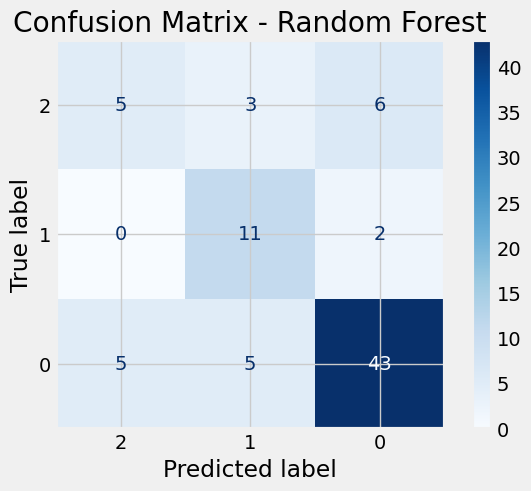

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Ubah target (origin) menjadi numerik
y = y.astype("category").cat.codes

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Random Forest")


1. True Positive (TP): Prediksi benar untuk kelas tertentu.
2.True Negative (TN): Model memprediksi bahwa sampel bukan kelas tertentu, dan benar.
3. False Positive (FP): Model memprediksi suatu kelas secara salah (sampel sebenarnya bukan kelas itu).
4. False Negative (FN): Model gagal memprediksi kelas tertentu (sampel sebenarnya kelas itu, tetapi diprediksi sebagai kelas lain).


---
Untuk setiap kelas:
1. Kelas 0 (europa):
- TP (Benar Kelas 0): 5 (baris 0, kolom 0).
- FP (Diprediksi Kelas 0 tapi salah): 5 + 5 = 10 (baris 1 kolom 0, baris 2 kolom 0).
- FN (Sebenarnya Kelas 0, tapi diprediksi salah): 3 + 6 = 9 (baris 0 kolom 1 dan baris 0 kolom 2).

2. Kelas 1(japan):

- TP (Benar Kelas 1): 11 (baris 1, kolom 1).
- FP (Diprediksi Kelas 1 tapi salah): 3 + 5 = 8 (baris 0 kolom 1, baris 2 kolom 1).
- FN (Sebenarnya Kelas 1, tapi diprediksi salah): 0 + 2 = 2 (baris 1 kolom 0 dan baris 1 kolom 2).

3. Kelas 2(USA):

- TP (Benar Kelas 2): 43 (baris 2, kolom 2).
- FP (Diprediksi Kelas 2 tapi salah): 6 + 2 = 8 (baris 0 kolom 2, baris 1 kolom 2).
- FN (Sebenarnya Kelas 2, tapi diprediksi salah): 5 + 5 = 10 (baris 2 kolom 0 dan baris 2 kolom 1).



---
Kesimpulan:
- Akurasi adalah 0.7375 (73.75%), yang menunjukkan bahwa 73.75% dari total prediksi model adalah benar.
- Kelas 2(USA)memiliki performa terbaik, dengan F1-score 0.83. Model berhasil mengidentifikasi sebagian besar sampel di kelas ini.
Kelas 0(Europa) memiliki performa paling rendah, dengan F1-score 0.42, karena recall-nya hanya 36%, menunjukkan banyak prediksi salah (FN tinggi).
Kelas 1(Japan) memiliki F1-score 0.69, dengan recall yang cukup tinggi (85%), artinya model cukup baik dalam mendeteksi kelas ini.
- Precision, recall, dan F1-score cukup seimbang secara keseluruhan (macro avg sekitar 0.64-0.67).



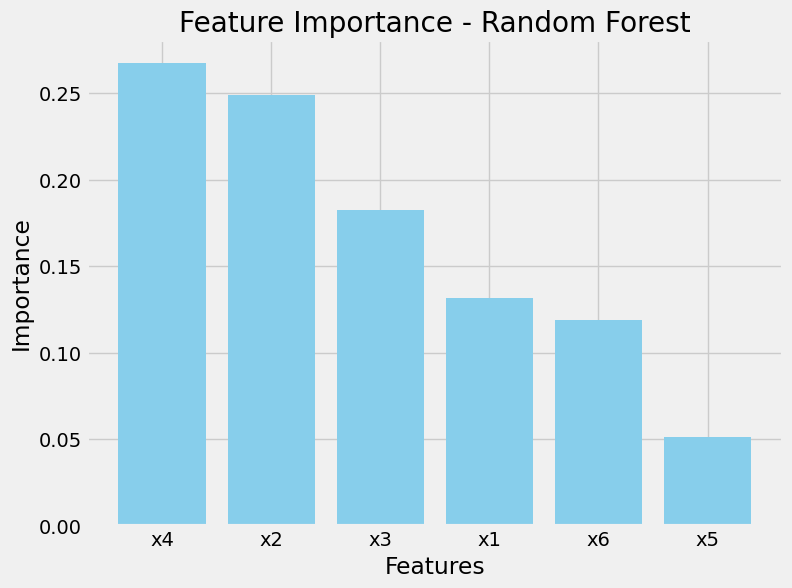

,Feature,Importance
3,x4,0.267533
1,x2,0.249114
2,x3,0.182448
0,x1,0.131359
5,x6,0.118588
4,x5,0.050958


In [11]:
# Mengidentifikasi fitur-fitur yang paling berpengaruh terhadap efisiensi bahan bakar, dengan berat kendaraan dan ukuran mesin menjadi faktor yang dominan.

# Assuming 'data' is the DataFrame containing the necessary columns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Menentukan target baru berdasarkan kolom 'x7' (mpg): Lulus (1) jika x7 >= 25, tidak lulus (0) jika < 25
# Instead of processed_data, use 'data'
data['passed'] = (data['x7'] >= 25).astype(int)

# Fitur prediktor
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Menghitung pentingnya fitur
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi pentingnya fitur
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Menampilkan DataFrame pentingnya fitur
feature_importance_df

1. x4 (Weight): 26.75%
2. x2 (Displacement): 24.91%
3. x3 (Horsepower): 18.24%
4. x1 (Cylinders): 13.14%
5. x6 (Model Year): 11.86%
6. x5 (Acceleration): 5.10%


---
1. Fitur paling penting:

- x4 (Weight), yang merupakan berat kendaraan, memiliki pengaruh terbesar dalam menentukan efisiensi bahan bakar. Ini mungkin karena kendaraan yang lebih berat cenderung membutuhkan lebih banyak energi untuk bergerak, sehingga mempengaruhi konsumsi bahan bakar.
- x2 (Displacement), yaitu ukuran mesin, juga penting. Mesin yang lebih besar (displacement lebih tinggi) biasanya mengonsumsi lebih banyak bahan bakar.
- x3 (Horsepower) berkontribusi cukup signifikan, yang menunjukkan bahwa kendaraan dengan daya lebih tinggi mungkin lebih boros bahan bakar.

2. Fitur dengan pengaruh yang lebih rendah:

- x1 (Cylinders) memiliki pengaruh yang lebih kecil dibandingkan dengan fitur lainnya, meskipun tetap berperan dalam model.
- x6 (Model Year) dan x5 (Acceleration) memiliki pengaruh yang lebih kecil terhadap prediksi efisiensi bahan bakar, meskipun tahun model dapat memberikan gambaran tentang teknologi mesin yang mungkin lebih efisien di kendaraan yang lebih baru.

3. fisiensi bahan bakar sebagai target:
Model ini menggunakan mpg (miles per gallon) sebagai dasar untuk menentukan apakah kendaraan "lulus" efisiensi bahan bakar, dengan ambang batas mpg >= 25 sebagai kriteria untuk "lulus". Dengan kata lain, kendaraan dengan mpg >= 25 dianggap efisien dan "lulus", sementara kendaraan dengan mpg < 25 dianggap kurang efisien dan "tidak lulus".


# 3. Model Decision Tree

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        68
           1       0.88      0.85      0.86        52

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



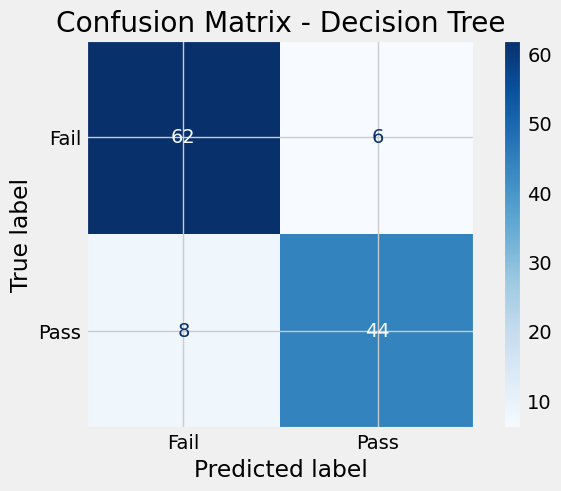

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd # Make sure pandas is imported

# Instead of processed_data, use 'data' which is already loaded
# Menentukan target: Lulus (1) jika x7 >= 25, Tidak lulus (0) jika x7 < 25
data['passed'] = (data['x7'] >= 25).astype(int)

# Fitur prediktor
features = ['x4', 'x5', 'x6']
X = data[features] # Use data instead of processed_data
y = data['passed']  # Use data instead of processed_data

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Decision Tree")
plt.show()

Penjelsan Confusion Matrix Random Forest


---


1. True Positives (TP): 62
* Model memprediksi Pass (lulus) dengan benar untuk 62 sampel.

2. True Negatives (TN): 44
* Model memprediksi Fail (tidak lulus) dengan benar untuk 44 sampel.

3. False Positives (FP): 6
* Model salah memprediksi Pass, padahal sebenarnya Fail.

4. False Negatives (FN): 8
* Model salah memprediksi Fail, padahal sebenarnya Pass.



Kesimpulan


---
* Model memiliki performa sangat baik dengan akurasi tinggi (88%) dan tingkat kesalahan prediksi yang sangat rendah.
* Menunjukkan bahwa model Decision Tree dapat digunakan pada dataset ini dengan tingkat kesalahan yang sangat rendah. Tetapi, harus di uji kembali saat cross - validation


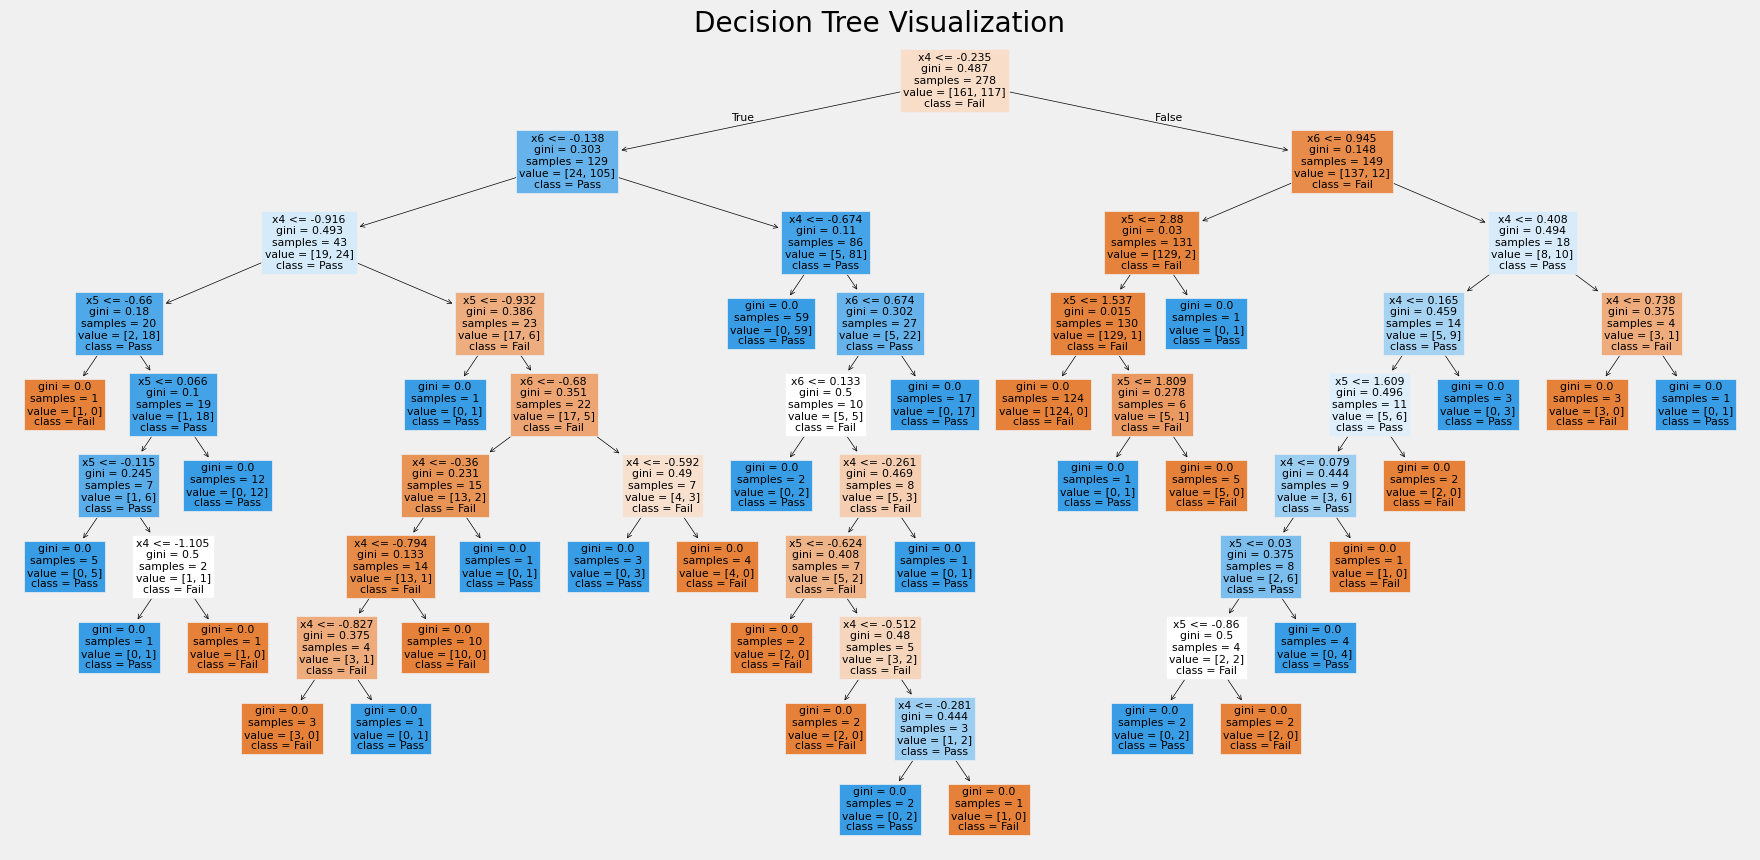

Decision Tree Rules:
|--- x4 <= -0.23
|   |--- x6 <= -0.14
|   |   |--- x4 <= -0.92
|   |   |   |--- x5 <= -0.66
|   |   |   |   |--- class: 0
|   |   |   |--- x5 >  -0.66
|   |   |   |   |--- x5 <= 0.07
|   |   |   |   |   |--- x5 <= -0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x5 >  -0.12
|   |   |   |   |   |   |--- x4 <= -1.11
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x4 >  -1.11
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- x5 >  0.07
|   |   |   |   |   |--- class: 1
|   |   |--- x4 >  -0.92
|   |   |   |--- x5 <= -0.93
|   |   |   |   |--- class: 1
|   |   |   |--- x5 >  -0.93
|   |   |   |   |--- x6 <= -0.68
|   |   |   |   |   |--- x4 <= -0.36
|   |   |   |   |   |   |--- x4 <= -0.79
|   |   |   |   |   |   |   |--- x4 <= -0.83
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- x4 >  -0.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x4 >  -0.79
|   |

In [13]:
# Membangun dan melatih model klasifikasi Decision Tree, yang digunakan untuk memprediksi apakah kendaraan efisien atau tidak berdasarkan fitur seperti berat (x4), akselerasi (x5), dan tahun model (x6).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree

# Using 'data' instead of 'processed_data'
data['passed'] = (data['x7'] >= 25).astype(int)  # Menentukan target berdasarkan x7 (mpg)
features = ['x4', 'x5', 'x6']  # Menggunakan fitur weight, acceleration, model_year
X = data[features]  # Using 'data' here
y = data['passed']  # Using 'data' here

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=features, class_names=['Fail', 'Pass'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Menampilkan aturan pohon keputusan dalam format teks yang rapi
tree_rules = export_text(dt_model, feature_names=features)
print("Decision Tree Rules:")
print(tree_rules)

# 4. Model Support Vector Machines(SVM)

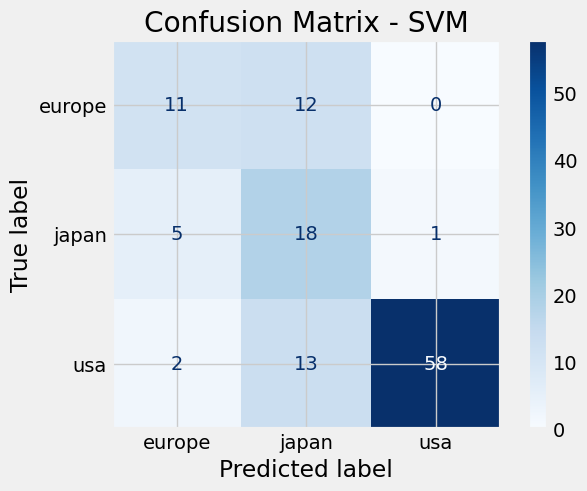

Laporan Klasifikasi:
              precision  recall  f1-score  support
europe             0.61    0.48      0.54    23.00
japan              0.42    0.75      0.54    24.00
usa                0.98    0.79      0.88    73.00
accuracy           0.72    0.72      0.72     0.72
macro avg          0.67    0.67      0.65   120.00
weighted avg       0.80    0.72      0.74   120.00


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Preprocessing: Menentukan target dan fitur
# Mengubah 'origin' menjadi label numerik
label_encoder = LabelEncoder()
data['origin_encoded'] = label_encoder.fit_transform(data['y'])

# Menentukan fitur prediktor dan target
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
X = data[features]
y = data['origin_encoded']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - SVM")
plt.show()

# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2)  # Membulatkan angka menjadi 2 desimal

# Menampilkan laporan klasifikasi yang rapi
print("Laporan Klasifikasi:")
print(df_report)


1. Performa Keseluruhan:
Model memiliki performa yang baik dengan akurasi 73%, meskipun ada beberapa kesalahan prediksi, khususnya pada kelas Europe dan Japan.

2. Kinerja terbaik ada pada kelas USA (dengan precision 98%).

3. Kelas Europe dan Japan memiliki kesalahan yang lebih tinggi, dengan F1-score masing-masing 54%.


## 5. Model K- Nearest Neighbors (KKN)

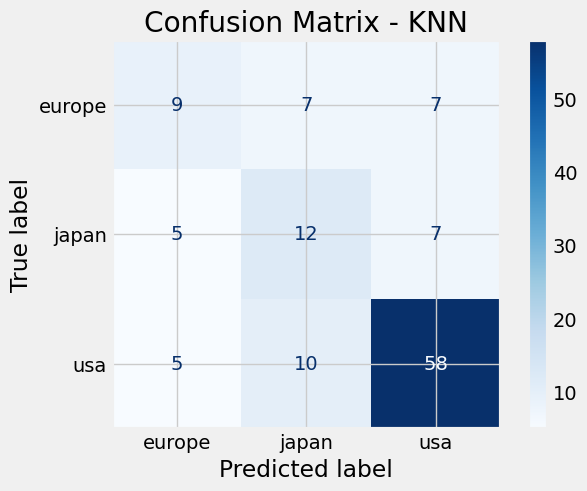

Classification Report:
               precision    recall  f1-score   support

      europe       0.47      0.39      0.43        23
       japan       0.41      0.50      0.45        24
         usa       0.81      0.79      0.80        73

    accuracy                           0.66       120
   macro avg       0.56      0.56      0.56       120
weighted avg       0.66      0.66      0.66       120



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Preprocessing: Mengubah 'origin' menjadi label numerik
label_encoder = LabelEncoder()
data['origin_encoded'] = label_encoder.fit_transform(data['y'])

# Menentukan fitur prediktor dan target
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
X = data[features]
y = data['origin_encoded']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model K-Nearest Neighbors (KNN)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - KNN")
plt.show()

# Menampilkan laporan klasifikasi
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_report_result)


# Menghitung Cross Validation

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preprocessing: Mengubah 'origin' menjadi label numerik
label_encoder = LabelEncoder()
data['origin_encoded'] = label_encoder.fit_transform(data['y'])

# Fitur prediktor
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
X = data[features]
y = data['passed']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inisialisasi model-model yang akan digunakan
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Melakukan cross-validation pada setiap model
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')  # 10-fold CV
    cv_results[model_name] = {
        'Mean Accuracy': np.mean(cv_scores),
        'Standard Deviation': np.std(cv_scores)
    }

# Menampilkan hasil cross-validation
for model_name, results in cv_results.items():
    print(f"{model_name}:\n"
          f"  Mean Accuracy: {results['Mean Accuracy']:.4f}\n"
          f"  Standard Deviation: {results['Standard Deviation']:.4f}\n")


K-Nearest Neighbors:
  Mean Accuracy: 0.8538
  Standard Deviation: 0.0674

Naive Bayes:
  Mean Accuracy: 0.8489
  Standard Deviation: 0.0503

Random Forest:
  Mean Accuracy: 0.8563
  Standard Deviation: 0.0598

SVM:
  Mean Accuracy: 0.8715
  Standard Deviation: 0.0737

Decision Tree:
  Mean Accuracy: 0.8162
  Standard Deviation: 0.0698



# Kesimpulan dari seluruh metode yang baik pada machine learning

penjelasan hasil cross validation

1. SVM:
* Mean Accuracy: 0.8715
* Standar Deviasi: 0.0737
* Interpretasi: SVM memiliki akurasi rata-rata yang sangat tinggi, serta deviasi standar yang rendah, menunjukkan model ini stabil dan sangat efektif dalam memprediksi dataset. Ini menunjukkan bahwa Random Forest adalah model yang sangat baik untuk dataset ini.

2. Random Forest:
* Mean Accuracy: 0.8563
* Standar Deviasi: 0.0598
* Interpretasi: Random Forest memiliki performa yang baik dengan akurasi rata-rata yang tinggi.

3. K-Nearest Neighbors:
* Mean Accuracy: 0.8538
* Standar Deviasi: 0.0674
* Interpretasi: K-Nearest Neighbors memiliki akurasi yang sedikit lebih rendah dibandingkan dengan model SVM dan Random Forest.

4. Naive Bayes:
* Mean Accuracy: 0.8489
* Standar Deviasi: 0.0503
* Interpretasi: Naive Bayes memiliki akurasi yang sedikit lebih rendah dibandingkan dengan model SVM,Random Forest dan K-Nearest Neighbors

5. Decision Tree:
* Mean Accuracy: 0.8162
* Standar Deviasi: 0.0698
* Interpretasi: Decision Tree memiliki akurasi yang sedikit lebih rendah dibandingkan dengan model- model lainnya'



---

Artinya model SVM yang memiliki model paling kuat diantara semua model berdasarkan cross- validation karena memiliki akurasi yang besar